In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ml_utils import permutation_feature_importance

In [16]:
data = load_iris()

In [17]:
X = data.data
y = data.target
X.shape, y.shape

((150, 4), (150,))

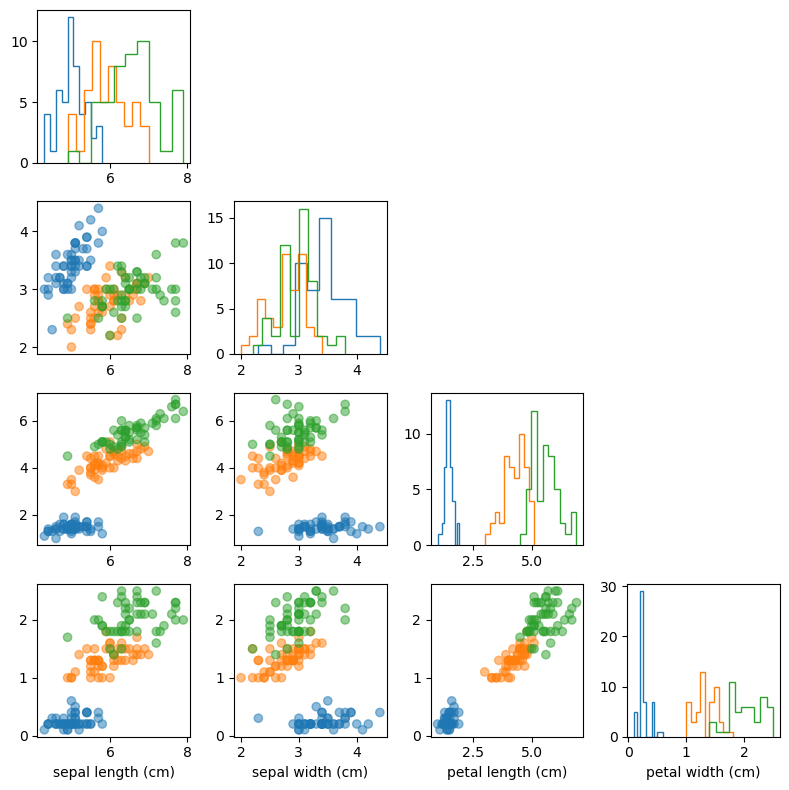

In [18]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8), layout='tight')
for row in range(4):
    for col in range(4):
        if col > row:
            ax[row, col].axis('off')
            continue
        if col == row:
            for l in range(3):
                ax[row, col].hist(X[y==l][:,row], histtype='step', color=f'C{l}')
            continue
        ax[row, col].scatter(X[:,col], X[:,row], c=[f'C{l}' for l in y], alpha=0.5)
for col in range(4):
    ax[-1, col].set_xlabel(data.feature_names[col])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, keras.utils.to_categorical(y), test_size=0.2, random_state=1234)
X_train.shape, y_train.shape

((120, 4), (120, 3))

In [20]:
def get_model(n=16):
    model = keras.models.Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(4*n, activation='relu'),
        keras.layers.Dense(2*n, activation='relu',),
        keras.layers.Dense(n, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    return model

In [21]:
model = get_model()
# model.summary()

In [22]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
history = model.fit(
    X_train, y_train,
    epochs=200, validation_split=0.2, verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

In [24]:
for metric_name, metric_value in zip(['loss', 'accuracy'], model.evaluate(X_test, y_test, verbose=0)):
    print(f"{metric_name} = {metric_value}")

loss = 0.06751623004674911
accuracy = 1.0


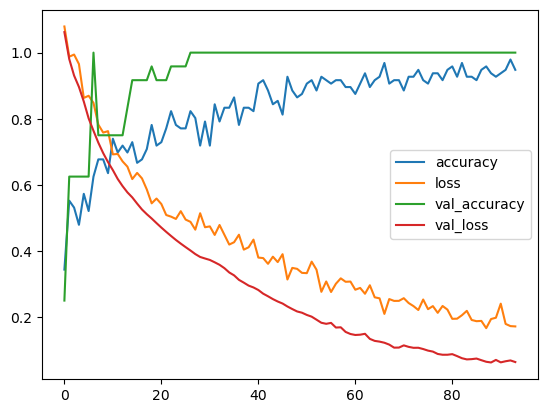

In [25]:
for metric in history.history.keys():
    plt.plot(history.history[metric], label=metric)
plt.legend();

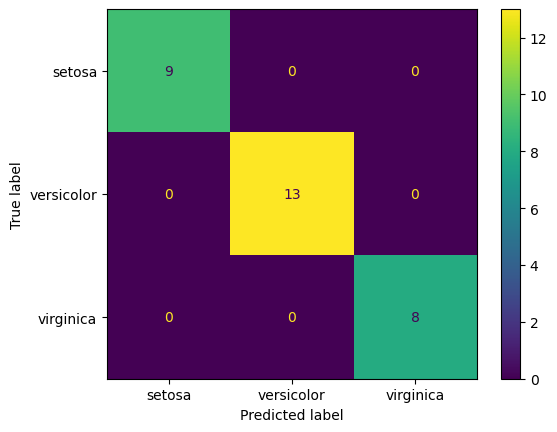

In [26]:
y_pred = model.predict(X_test, verbose=0)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot();

In [27]:
FI = permutation_feature_importance(model, X_test, y_test)

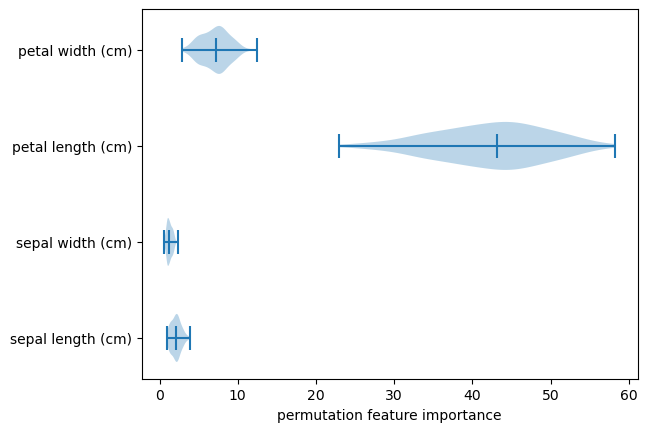

In [28]:
plt.violinplot(FI.T, orientation='horizontal', showmedians=True)
plt.yticks(np.arange(FI.shape[0])+1, data.feature_names)
plt.xlabel("permutation feature importance");